In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
sample_df = pd.read_csv(uci_path)
sample_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
sample_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
# 분석에 사용할 feature를 카피
copy_df = sample_df.iloc[:, :]
copy_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [15]:
# 표준화 진행
from sklearn.preprocessing import StandardScaler

copy_scaler = StandardScaler().fit_transform(copy_df)
copy_scaler

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [27]:
# 군집 모형 학습 및 예측
# 예측된 결과를 데이터프레임에 추가

sample_kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10)
sample_kmeans.fit(copy_scaler)
sample_kmeans.labels_

copy_df['cluster_id'] = sample_kmeans.labels_
copy_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,4
4,2,3,22615,5410,7198,3915,1777,5185,1


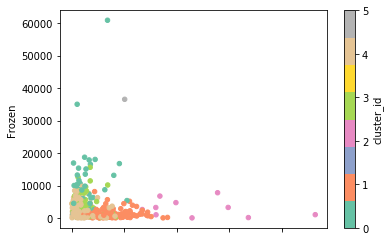

In [32]:
# 시각화
copy_df.plot(kind = 'scatter', x = 'Grocery', y = 'Frozen', c = 'cluster_id', colorbar = True, cmap = 'Set2')
plt.show()

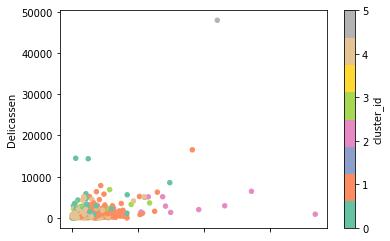

In [33]:
# 시각화
copy_df.plot(kind = 'scatter', x = 'Milk', y = 'Delicassen', c = 'cluster_id', colorbar = True, cmap = 'Set2')
plt.show()

In [34]:
# PCA 차원축소 2
# 군집화 시각화 진행
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_copy = pca.fit(copy_scaler).transform(copy_scaler)

pca_copy_df = pd.DataFrame(pca_copy, columns = ['pca01', 'pca02'])
pca_copy_df['target'] = copy_df['cluster_id']
pca_copy_df.head()

,pca01,pca02,target
0,0.843939,-0.515351,1
1,1.062676,-0.484601,1
2,1.269141,0.682055,1
3,-1.056782,0.610821,4
4,0.634030,0.974199,1


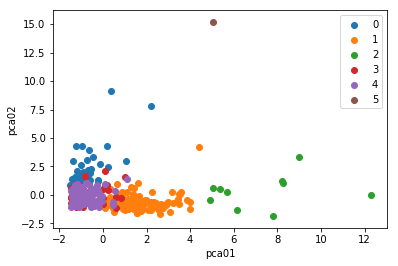

In [35]:
# 각 타겟별 데이터 분포 확인
markers = ['o', 'o', 'o', 'o', 'o', 'o']

for i, marker in enumerate(markers) :
    # print(i, marker)
    
    x_data_point = pca_copy_df[pca_copy_df['target'] == i]['pca01']
    y_data_point = pca_copy_df[pca_copy_df['target'] == i]['pca02']
    # print(x_data_point, y_data_point)
    
    plt.scatter(x_data_point, y_data_point, marker = marker, label = i)

plt.legend()
plt.xlabel('pca01')
plt.ylabel('pca02')
plt.show()